In [19]:
from sklearn import preprocessing
import pandas as pd
import numpy as np

#leemos archivo de pokemon
df = pd.read_csv("Datos/pokemon2.csv", nrows = 100000)
df.columns
df_fights = pd.read_csv("Datos/combats.csv", nrows = 100000)
df_fights

,First_pokemon,Second_pokemon,Winner
0,266,298,298
1,702,701,701
2,191,668,668
3,237,683,683
4,151,231,151
...,...,...,...
49995,707,126,707
49996,589,664,589
49997,303,368,368
49998,109,89,109


In [20]:
df.columns

Index(['#', 'Name', 'Type 1', 'Type 2', 'HP', 'Attack', 'Defense', 'Sp. Atk',
       'Sp. Def', 'Speed', 'Generation', 'Legendary'],
      dtype='object')

In [21]:
#Transformación de las columnas Type 1 y Type 2 con datos tipo String en columnas de tipos de pokemon con booleanos
types1 = pd.get_dummies(df["Type 1"])
types2 = pd.get_dummies(df["Type 2"])
pd.set_option('max_rows', None)
pd.reset_option('max_rows')
types = types1 | types2


df_clean = pd.merge(df, types, left_index=True, right_index=True)

df_clean.dropna(thresh=28,inplace=True)
df_clean.drop(["Type 1", "Type 2"], axis = 1,inplace= True)
df_clean

,#,Name,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,...,Ghost,Grass,Ground,Ice,Normal,Poison,Psychic,Rock,Steel,Water
0,1,Bulbasaur,45,49,49,65,65,45,1,False,...,0,1,0,0,0,1,0,0,0,0
1,2,Ivysaur,60,62,63,80,80,60,1,False,...,0,1,0,0,0,1,0,0,0,0
2,3,Venusaur,80,82,83,100,100,80,1,False,...,0,1,0,0,0,1,0,0,0,0
3,4,Mega Venusaur,80,100,123,122,120,80,1,False,...,0,1,0,0,0,1,0,0,0,0
4,5,Charmander,39,52,43,60,50,65,1,False,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,796,Diancie,50,100,150,100,150,50,6,True,...,0,0,0,0,0,0,0,1,0,0
796,797,Mega Diancie,50,160,110,160,110,110,6,True,...,0,0,0,0,0,0,0,1,0,0
797,798,Hoopa Confined,80,110,60,150,130,70,6,True,...,1,0,0,0,0,0,1,0,0,0
798,799,Hoopa Unbound,80,160,60,170,130,80,6,True,...,0,0,0,0,0,0,1,0,0,0


In [22]:
# Se cambia el nombre de las columnas del dataframe de combates
df_fights.rename(columns = {'First_pokemon':'ID1', 'Second_pokemon':'ID2',
 'Winner': 'isFirstWinner'}, inplace = True)

#Se cambia el valor del la columna ganadora por un true o un false dependiendo de si ha ganado el pokemon de la primera columna o no
df_fights.loc[df_fights['isFirstWinner'] == df_fights['ID1'], 'isFirstWinner'] = True
df_fights.loc[df_fights['isFirstWinner'] == df_fights['ID2'], 'isFirstWinner'] = False
df_fights.dropna(inplace=True)

df_fights

,ID1,ID2,isFirstWinner
0,266,298,False
1,702,701,False
2,191,668,False
3,237,683,False
4,151,231,True
...,...,...,...
49995,707,126,True
49996,589,664,True
49997,303,368,False
49998,109,89,True


In [23]:
# Igualamos el nombre de la columna del id a ID1
df_clean.rename(columns = {'#':'ID1'}, inplace= True)
df_clean.columns
df_fights.columns
#Añadimos todos los campos del 1er pokemon a la tabla
df_fights = df_fights.merge(df_clean, on='ID1')
df_fights


,ID1,ID2,isFirstWinner,Name,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,...,Ghost,Grass,Ground,Ice,Normal,Poison,Psychic,Rock,Steel,Water
0,266,298,False,Larvitar,50,64,50,45,50,41,...,0,0,1,0,0,0,0,1,0,0
1,266,301,False,Larvitar,50,64,50,45,50,41,...,0,0,1,0,0,0,0,1,0,0
2,266,304,True,Larvitar,50,64,50,45,50,41,...,0,0,1,0,0,0,0,1,0,0
3,266,247,False,Larvitar,50,64,50,45,50,41,...,0,0,1,0,0,0,0,1,0,0
4,266,690,False,Larvitar,50,64,50,45,50,41,...,0,0,1,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,775,470,True,Goomy,45,50,35,55,75,40,...,0,0,0,0,0,0,0,0,0,0
49996,775,676,False,Goomy,45,50,35,55,75,40,...,0,0,0,0,0,0,0,0,0,0
49997,775,159,False,Goomy,45,50,35,55,75,40,...,0,0,0,0,0,0,0,0,0,0
49998,775,578,True,Goomy,45,50,35,55,75,40,...,0,0,0,0,0,0,0,0,0,0


In [5]:
# Igualamos el nombre de la columna del id a ID2
df_clean.rename(columns = {'ID1':'ID2'}, inplace= True)
#Añadimos todos los campos del 2º pokemon a la tabla
df_fights = df_fights.merge(df_clean, on='ID2')

#El resultado de los ultimos dos merges es un dataframe cuyas columnas son
#los datos de dos pokemon en una misma linea y si el primero de ellos es el ganador del combate o no

df_fights = df_fights.drop(["ID1","ID2"], axis = 1)

In [6]:
#cambiamos true y false por ints 1 y 0 por comodidad
df_fights["isFirstWinner"] = df_fights["isFirstWinner"].astype(int)
df_fights

,isFirstWinner,Name_x,HP_x,Attack_x,Defense_x,Sp. Atk_x,Sp. Def_x,Speed_x,Generation_x,Legendary_x,...,Ghost_y,Grass_y,Ground_y,Ice_y,Normal_y,Poison_y,Psychic_y,Rock_y,Steel_y,Water_y
0,0,Larvitar,50,64,50,45,50,41,2,False,...,0,1,0,0,0,0,0,0,0,0
1,0,Machop,70,80,50,35,35,35,1,False,...,0,1,0,0,0,0,0,0,0,0
2,0,Whiscash,110,78,73,76,71,60,3,False,...,0,1,0,0,0,0,0,0,0,0
3,1,Fan Rotom,50,65,107,105,107,86,4,False,...,0,1,0,0,0,0,0,0,0,0
4,1,Zangoose,73,115,60,60,60,90,3,False,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,0,Scatterbug,38,35,40,27,25,35,6,False,...,0,1,0,1,0,0,0,0,0,0
49996,1,Skiploom,55,45,50,45,65,80,2,False,...,0,1,0,1,0,0,0,0,0,0
49997,1,Regigigas,110,160,110,80,110,100,4,True,...,0,1,0,1,0,0,0,0,0,0
49998,1,Exploud,104,91,63,91,73,68,3,False,...,0,1,0,1,0,0,0,0,0,0


In [7]:
# Vamos a normalizar todas las variables para que estén dentro de una misma escala, centrada en 0.
# Esto se comenta para que luego el gráfico tenga valores más fáciles de identificar

#scaler = preprocessing.StandardScaler().fit(df_fights.drop(["Name_x","Name_y"], axis=1))
#df_scaled = scaler.transform(df_fights.drop(["Name_x","Name_y"], axis=1))
#df_scaled = pd.DataFrame(df_scaled)
#print(df_scaled)

In [8]:
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier

#ejecutamos esta línea solo si no queremos escalar (no escalamos para que el gráfico se vea bien)
#para escalar los datos se debe descomentar el bloque anterior y comentar la siguiente linea
df_scaled =df_fights.drop(["Name_x","Name_y"], axis=1)

df_scaled = df_scaled.sample(frac = 1)
dftest = df_scaled.tail(30000)
dfrest = df_scaled.head(20000)

<h1>Arbol de clasificación</h1>

In [9]:
#Arbol de clasificación
clf = tree.DecisionTreeClassifier()

# Entrenaremos el objeto clf utilizando el método fit con la variable regresora X y la respuesta Y

#estas lineas si no está normalizado
X = dfrest.drop(["isFirstWinner"], axis=1)
X_test = dftest.drop(["isFirstWinner"], axis=1)
Y = dfrest["isFirstWinner"] == 1
Y_test = dftest["isFirstWinner"] == 1


#estas lineas si está normalizado
#X = dfrest.drop([0], axis=1)
#X_test = dftest.drop([0], axis=1
#Y = dfrest[0] > 1
#Y_test = dftest[0] > 1

clf = clf.fit(X, Y)
Y_pred = clf.predict(X)
Y_pred_test = clf.predict(X_test)

In [10]:
#Medimos precisión del modelo
np.mean(Y_test == Y_pred_test)

0.9256333333333333

<h2>Gráfico de árbol</h2>

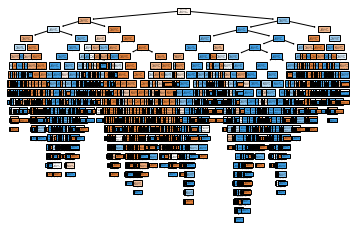

In [11]:
import matplotlib.pyplot as plt

#creamos el diagrama y lo guardamos en un archivo .eps
plt.figure()
tree.plot_tree(clf, filled=True)
plt.savefig('arbol_decision.eps', format='eps', bbox_inches = 'tight')

<h1>Random Forest</h1>

In [12]:
#Random forest

# Vamos a comparar con RandomForest, generamos 100 árboles y que utilice todos los núcleos de nuestro PC
clf = RandomForestClassifier(n_estimators = 100, n_jobs = -1)
clf.fit(X, Y)
Y_pred_test = clf.predict(X_test)

In [13]:
#Medimos precisión del modelo
np.mean(Y_test == Y_pred_test)

0.9323